<a href="https://colab.research.google.com/github/nonlinear-1/-/blob/main/%E4%B8%93%E4%B8%9A%E5%AE%9E%E4%B9%A0_%E6%8A%A5%E5%91%8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re

# 读取数据
df = pd.read_csv('house.csv')

# 数据检查
print(df.shape)
print(df.isnull().sum())
print(df.duplicated().sum())

# 数据清洗
df = df.dropna().drop_duplicates()
print(df.shape)

# 处理数值型数据
def extract_number(x):
    """提取字符串中的第一个数字（可能有小数部分）。"""
    numbers = re.findall(r'-?\d+\.\d+|-?\d+', str(x))
    return float(numbers[0]) if numbers else pd.NA

for column in ['产权', '单价', '年限', '楼层', '面积']:
    df[column] = df[column].apply(extract_number)

# 处理户型数据
def parse_rooms(x):
    """解析户型信息，返回室和厅的数量。"""
    try:
        rooms = re.findall(r'\d', x)
        return int(rooms[0]), int(rooms[1]) if len(rooms) > 1 else (int(rooms[0]), 0)
    except (ValueError, IndexError):
        return 0, 0

df[['室', '厅']] = df['户型'].apply(parse_rooms).apply(pd.Series)

# 处理区域和挂牌时间
df['区域'] = df['区域'].str[:2]
df['挂牌时间'] = pd.to_numeric(df['挂牌时间'].str[:4], errors='coerce')

# 处理年限数据
time0 = df[['年限', '挂牌时间']].dropna()

# 计算均值并填充缺失值
mean_difference = (time0['挂牌时间'] - time0['年限']).mean()
df['年限'] = df['年限'].fillna(df['挂牌时间'] - mean_difference)

# 处理朝向数据
directions = ['东南', '东北', '西南', '西北', '东', '南', '西', '北']

for direction in directions:
    df[direction] = df['朝向'].apply(lambda x: 1 if direction in str(x) else 0)
    df['朝向'] = df['朝向'].apply(lambda x: str(x).replace(direction, ''))

# 保存结果到 Excel 文件
df = df.dropna()
# df.to_excel('output_.xlsx', index=False)

(30771, 14)
产权       0
关注       0
区域       1
单价       0
小区       1
年限       0
总价/万元    0
户型       0
房屋编码     0
挂牌时间     0
朝向       0
楼层       0
装修情况     0
面积       0
dtype: int64
5
(30765, 14)


In [ ]:
import pandas as pd

df = pd.read_excel('output_数据处理好.xlsx')

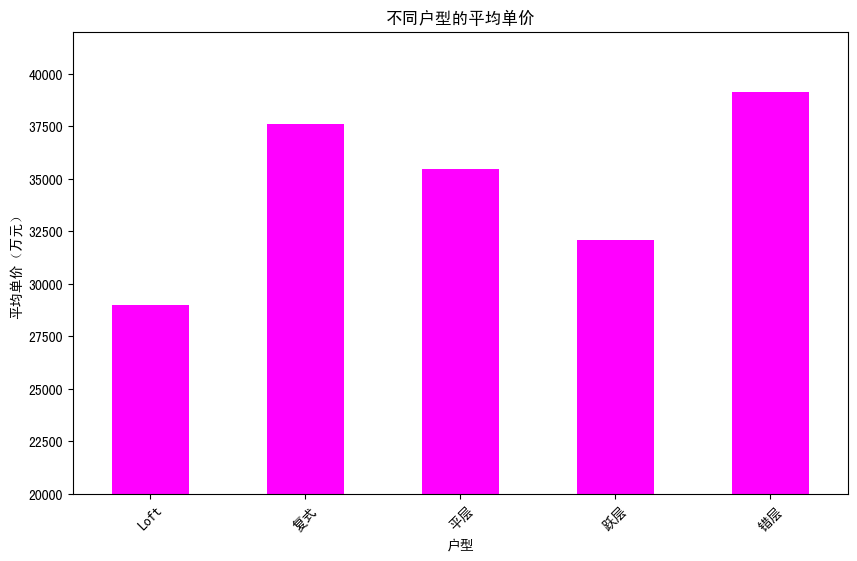

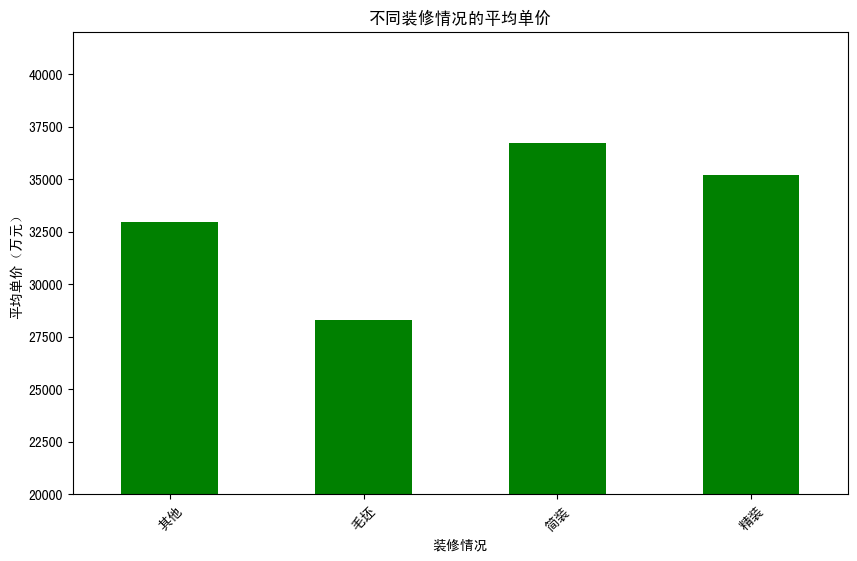

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 字体设置
mpl.font_manager.fontManager.addfont('SimHei.ttf')
mpl.rc('font', family='SimHei')
mpl.rcParams['axes.unicode_minus'] = False

# 标准化“装修情况”列的值
def standardize_decoration(value):
    parts = value.split('/')
    return (parts[0].strip(), parts[1].strip()) if len(parts) == 2 else (None, value.strip())

# 拆分“装修情况”列
df[['户型', '装修']] = df['装修情况'].apply(lambda x: pd.Series(standardize_decoration(x)))

# 计算平均单价
type_avg_price = df[df['户型'].notna()].groupby('户型')['单价'].mean()
decoration_avg_price = df.groupby('装修')['单价'].mean()

# 绘制户型平均单价柱状图
plt.figure(figsize=(10, 6))
type_avg_price.plot.bar(color='magenta', ylim=(20000, 42000))
plt.title('不同户型的平均单价')
plt.xlabel('户型')
plt.ylabel('平均单价（万元）')
plt.xticks(rotation=45)
plt.show()

# 绘制装修情况平均单价柱状图
plt.figure(figsize=(10, 6))
decoration_avg_price.plot.bar(color='green', ylim=(20000, 42000))
plt.title('不同装修情况的平均单价')
plt.xlabel('装修情况')
plt.ylabel('平均单价（万元）')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 修改“区域”列，给所有区域名称添加“区”或“市”
df['区域'] = df['区域'].apply(lambda x: x + '市' if x == '临安' else x + '区')

# 计算各区域的平均单价
area_avg_price = df.groupby('区域')['单价'].mean().reset_index()

# 转换数据为列表格式，单价取整
area_data = [(row['区域'], int(row['单价'])) for _, row in area_avg_price.iterrows()]
print(area_data)

# 主城区列表
center = ['上城区', '下城区', '西湖区', '拱墅区', '江干区']

# 计算主城区和其他区域的平均单价
center_avg = area_avg_price[area_avg_price['区域'].isin(center)]['单价'].mean()
secondary_center_avg = area_avg_price[~area_avg_price['区域'].isin(center)]['单价'].mean()

# 数据展示
categories = ['主城区', '其他区域']
values = [center_avg, secondary_center_avg]

[('上城区', 49927), ('下城区', 40964), ('临安市', 17977), ('余杭区', 25728), ('富阳区', 19927), ('拱墅区', 40814), ('江干区', 38793), ('滨江区', 41532), ('萧山区', 30559), ('西湖区', 46863), ('钱塘区', 26405)]


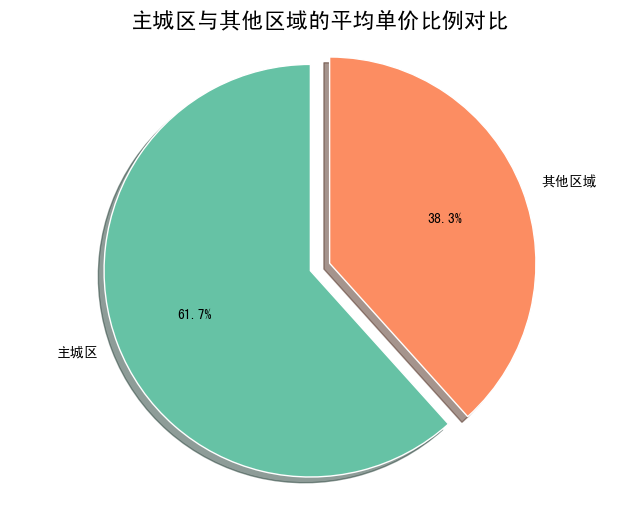

In [ ]:
# 自定义颜色方案
colors = ['#66c2a5', '#fc8d62']

# 设置饼图突出效果
explode = [0.1, 0]

# 绘制饼图
plt.figure(figsize=(8, 6))
plt.pie(values, labels=categories, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode,
        shadow=True, wedgeprops={'edgecolor': 'w'})

# 添加标题
plt.title('主城区与其他区域的平均单价比例对比', fontsize=16, fontweight='bold')

# 确保饼图是圆形
plt.axis('equal')

# 显示图表
plt.show()

In [ ]:
!pip install pyecharts
from pyecharts.charts import Map
from pyecharts import options as opts

# 创建Map图表
map_chart = Map()

# 添加数据
map_chart.add("房价", area_data, "杭州")

# 获取最小和最大房价
min_price = min(area_avg_price['单价'])
max_price = max(area_avg_price['单价'])

# 设置全局选项
map_chart.set_global_opts(
    title_opts=opts.TitleOpts(title="杭州各区房价分布情况"),
    visualmap_opts=opts.VisualMapOpts(
        min_=min_price,
        max_=max_price,
        is_show=True,
        is_piecewise=False,
        range_color=['#FFE0B2', '#FF0000']
    )
)

# 渲染到HTML
map_chart.render('hangzhou_housing_price_distribution.html')

'/content/hangzhou_housing_price_distribution.html'

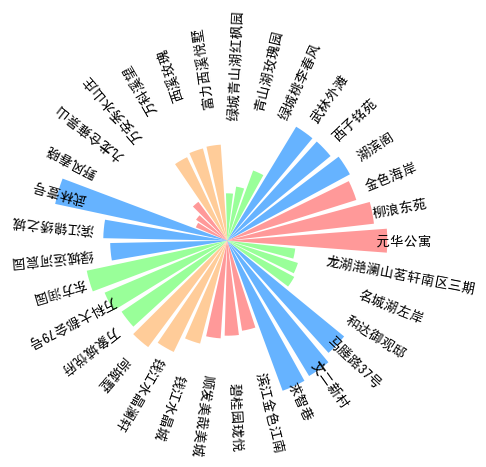

In [ ]:
# 计算每个小区的平均单价，返回前3名
def Apart_fun(x):
    ans_ = x.groupby('小区')['单价'].mean().sort_values(ascending=False)
    return ans_[:3]

# 按区域分组，计算每个区域前3个小区的平均单价
Apartment_top3 = df.groupby('区域').apply(Apart_fun)

# 创建极坐标子图
ax = plt.subplot(111, projection='polar')

# 角度和颜色设置
r = np.linspace(0, 2 * np.pi, 33, endpoint=False)
color_list = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99']

# 绘制极坐标条形图
plt.bar(r, Apartment_top3, width=0.15, color=[i for i in color_list for j in range(3)])

# 图形美化
ax.grid(False)
ax.set_frame_on(False)
ax.set_rgrids([], [])
ax.set_thetagrids([], [])

# 添加标签
for i in range(33):
    plt.text(r[i], Apartment_top3.max(),
             Apartment_top3.index.get_level_values(1).tolist()[i],
             rotation=r[i] * 180 / np.pi, ha='center', va='center')

# 显示图表
plt.show()

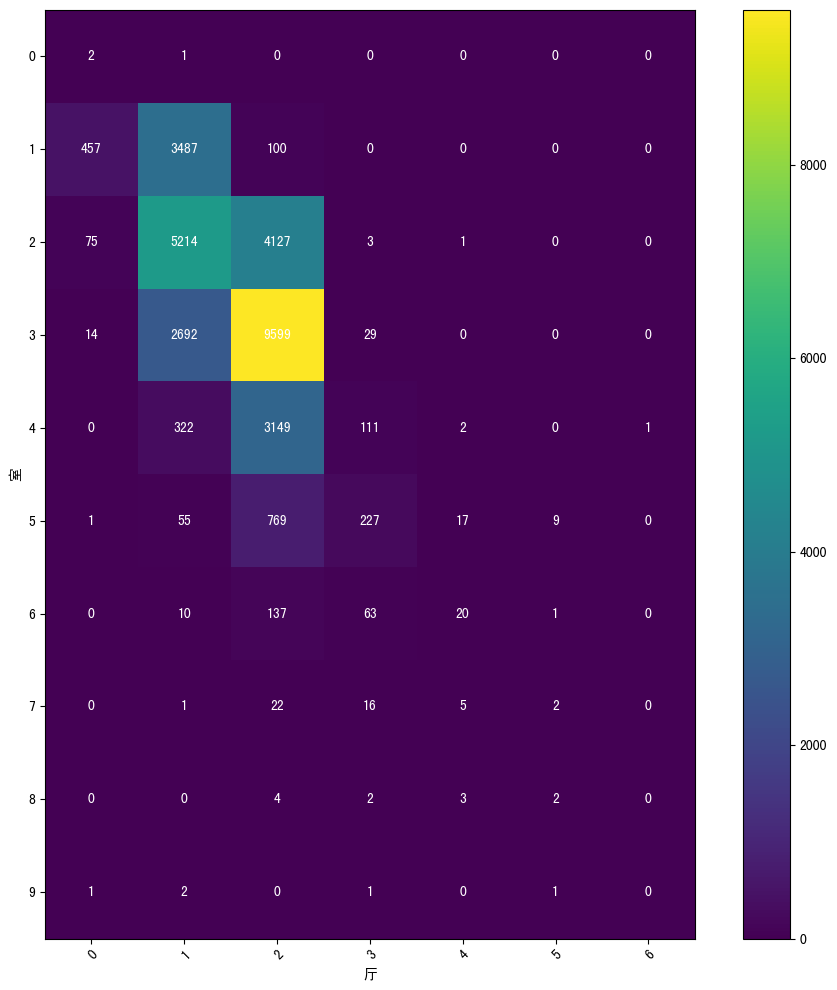

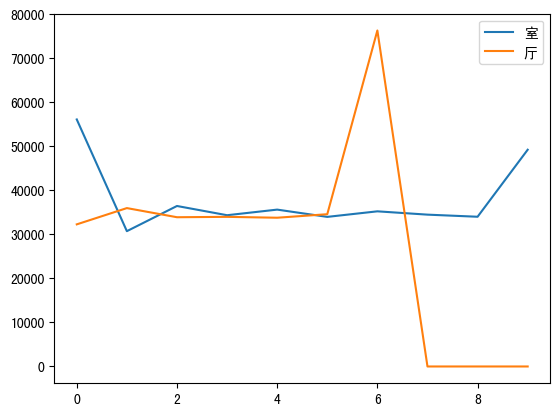

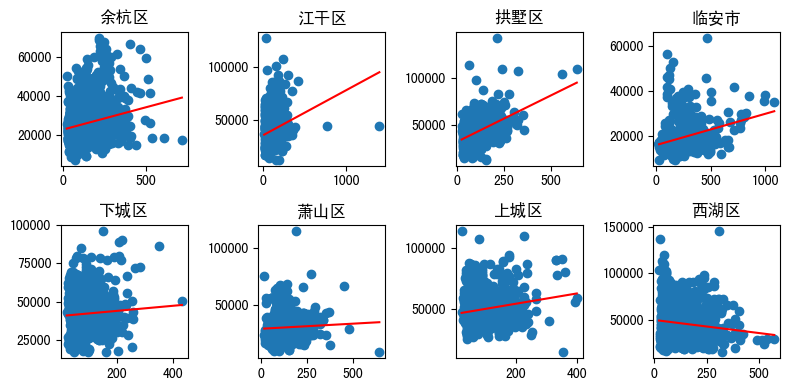

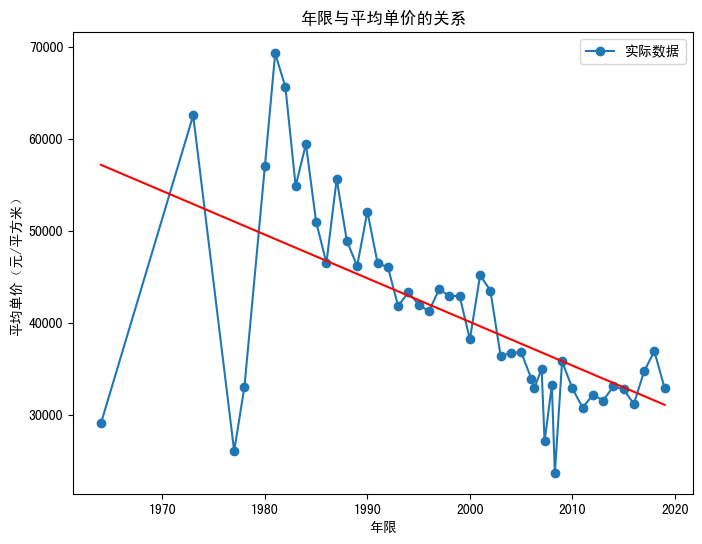

In [ ]:
# 创建透视表
house_data = pd.pivot_table(df, index='室', columns='厅', values='单价', aggfunc='count', fill_value=0)

# 绘制热力图
plt.figure(figsize=(10, 10))

# 显示每个单元格内的数量
for i in range(house_data.shape[0]):
    for j in range(house_data.shape[1]):
        plt.text(j, i, int(house_data.values[i, j]), ha="center", va="center", color="w", fontsize=10)

plt.xticks(np.arange(house_data.shape[1]), labels=house_data.columns, rotation=45, rotation_mode="anchor", ha="right")
plt.yticks(np.arange(house_data.shape[0]), labels=house_data.index)
plt.xlabel('厅')
plt.ylabel('室')
plt.imshow(house_data, cmap='viridis')
plt.colorbar()
plt.tight_layout()
plt.show()

# 计算平均单价
room_data = df.groupby('室')['单价'].mean()
hall_data = df.groupby('厅')['单价'].mean()

# 创建 DataFrame
rh_data = pd.DataFrame({'室': room_data, '厅': hall_data}).fillna(0)

# 绘制折线图
rh_data.plot.line()
plt.show()

# 创建子图，2 行 4 列
fig, AX = plt.subplots(2, 4, figsize=(8, 4))
areas = df['区域'].unique()

# 绘制每个区域的面积与单价关系图
for i, ax in enumerate(AX.flat):
    data_ = df[df['区域'] == areas[i]]
    area_data = data_.groupby('面积')[['单价']].mean()
    ax.scatter(area_data.index, area_data.values)

    # 拟合线
    x = area_data.index.values
    y = area_data.values.flatten()
    coeffs = np.polyfit(x, y, 1)
    fit_line = np.poly1d(coeffs)
    ax.plot(x, fit_line(x), color='red', label='拟合线')
    ax.set_title(areas[i])

plt.tight_layout()
plt.show()

# 按年限分组，计算平均单价
year_data = df.groupby('年限')['单价'].mean()

# 绘制折线图
plt.figure(figsize=(8, 6))
plt.plot(year_data.index, year_data.values, label='实际数据', marker='o')

# 拟合线
x = year_data.index.values
y = year_data.values
coeffs = np.polyfit(x, y, 1)
fit_line = np.poly1d(coeffs)
plt.plot(x, fit_line(x), color='red')

plt.legend()
plt.title('年限与平均单价的关系')
plt.xlabel('年限')
plt.ylabel('平均单价（元/平方米）')
plt.show()

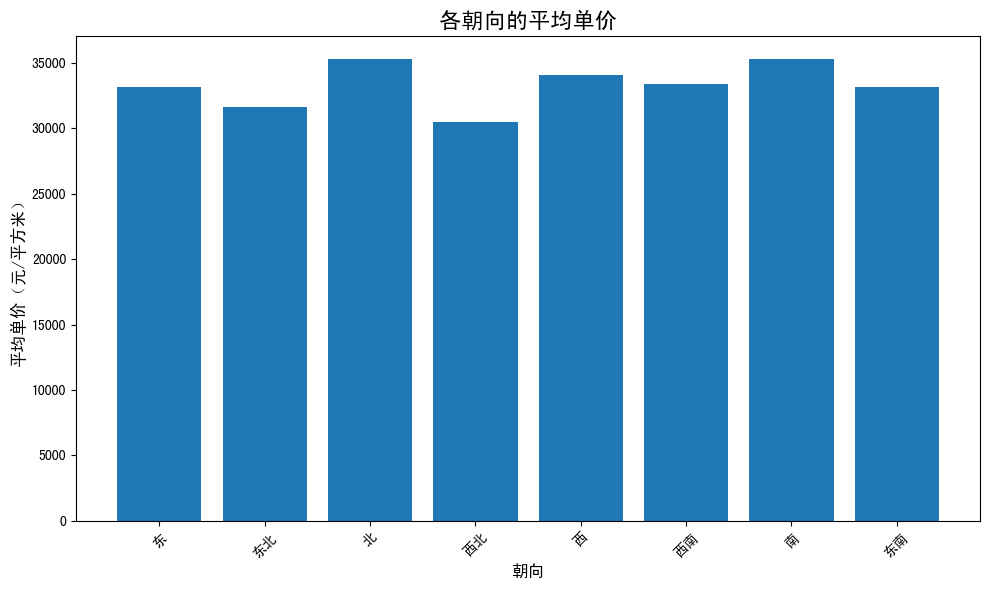

In [ ]:
# 方位
directions = ['东', '东北', '北', '西北', '西', '西南', '南', '东南']

# 创建DataFrame
d = pd.DataFrame({
    '朝向': directions,
    '平均单价': [df[df[direction] == 1]['单价'].mean() for direction in directions]
})

# 绘制直方图
plt.figure(figsize=(10, 6))
plt.bar(d['朝向'], d['平均单价'])

# 设置标题和标签
plt.title('各朝向的平均单价', fontsize=16)
plt.xlabel('朝向', fontsize=12)
plt.ylabel('平均单价（元/平方米）', fontsize=12)

# 调整x轴标签
plt.xticks(rotation=45)

# 显示图形
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# 区域编码
area_dict = {item: i for i, item in enumerate(area_avg_price['区域'])}
df['area'] = df['区域'].map(area_dict)

# 特征和目标变量
X, Y = df[['area', '室', '厅', '楼层', '面积', '年限', '挂牌时间', '产权', '关注', '东南', '东北', '西南', '西北', '东', '南', '西', '北']], df['单价']
X = X.astype(float)

# 训练、测试集划分
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

1 Mean Squared Error: 147239968.3039628
1 Root Mean Squared Error (RMSE): 12134.24774363713
1 Mean Absolute Percentage Error (MAPE): 0.30882116796365744
1 R^2: 0.1955222273249636
Coefficients: [  776.28071109   917.75777867 -2443.30748104    31.48146905
   -17.93614437  -415.54548246 -1941.0315891    358.76923362
   -20.64483931  2585.0990371   3810.10474238  3165.78532615
  1701.88974263  1201.01274954  2461.90167688  2528.99767457
   817.23175536]
Intercept: 4759832.348474345


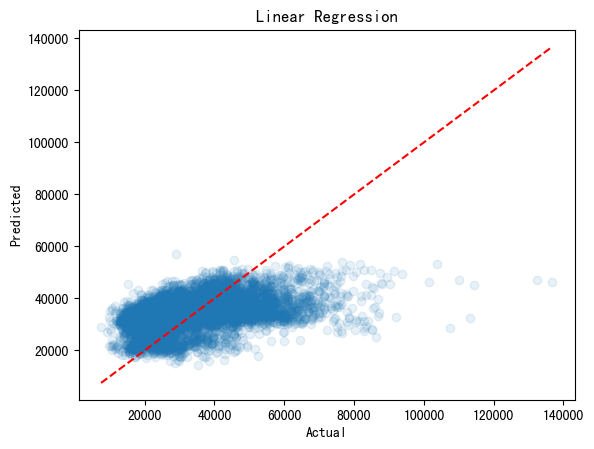

2 Mean Squared Error: 77801455.81410904
2 Root Mean Squared Error (RMSE): 8820.513353207343
2 Mean Absolute Percentage Error (MAPE): 0.15621556755011953
2 R^2: 0.5749147286217857


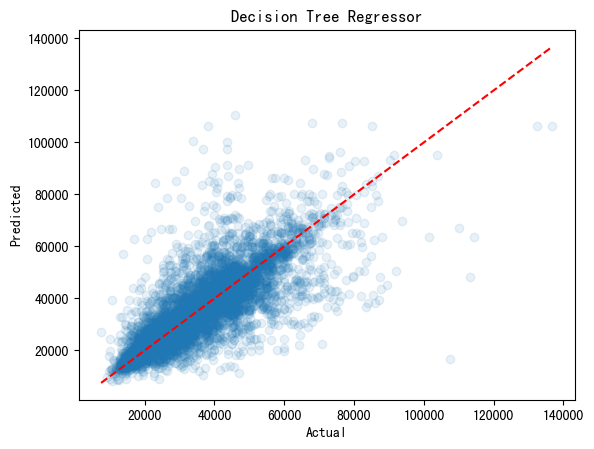

3 Mean Squared Error: 49185770.41610352
3 Root Mean Squared Error (RMSE): 7013.256762453769
3 Mean Absolute Percentage Error (MAPE): 0.1437643114696104
3 R^2: 0.7312627849119979


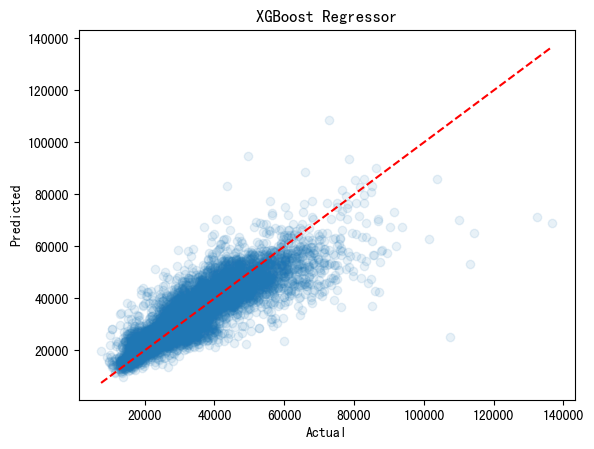

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb

# 线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"1 Mean Squared Error: {mse}")
print(f"1 Root Mean Squared Error (RMSE): {rmse}")
print(f"1 Mean Absolute Percentage Error (MAPE): {mape}")
print(f"1 R^2: {r2}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
plt.scatter(y_test, y_pred, alpha=0.1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')
plt.show()

# 决策树模型
DTmodel = DecisionTreeRegressor()
DTmodel.fit(X_train, y_train)
y_pred = DTmodel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"2 Mean Squared Error: {mse}")
print(f"2 Root Mean Squared Error (RMSE): {rmse}")
print(f"2 Mean Absolute Percentage Error (MAPE): {mape}")
print(f"2 R^2: {r2}")
plt.scatter(y_test, y_pred, alpha=0.1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor')
plt.show()

# XGBoost模型
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=42)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"3 Mean Squared Error: {mse}")
print(f"3 Root Mean Squared Error (RMSE): {rmse}")
print(f"3 Mean Absolute Percentage Error (MAPE): {mape}")
print(f"3 R^2: {r2}")
plt.scatter(y_test, y_pred, alpha=0.1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost Regressor')
plt.show()

4 Mean Squared Error: 0.0023240790603159035
4 Root Mean Squared Error (RMSE): 0.04820870315944937
4 Mean Absolute Percentage Error (MAPE): 0.17775746080428698
4 R^2: 0.7572453786272928


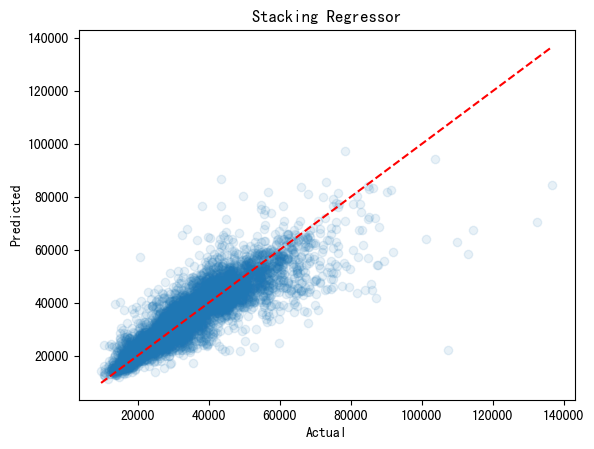

In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import MinMaxScaler

# 对 X 进行 Min-Max 归一化
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

# 对 Y 进行 Min-Max 归一化
scaler_y = MinMaxScaler()
Y_scaled = scaler_y.fit_transform(np.array(Y).reshape(-1, 1))

# 训练测试集划分
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)
y_train = y_train.flatten()
y_test = y_test.flatten()

# 定义基础回归器
base_regressors = [
    ('xgb1', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)),

    ('xgb2', xgb.XGBRegressor(objective='reg:squarederror', n_estimators=20)),

    # 第一棵决策树：限制最大深度
    ('dt1', DecisionTreeRegressor(max_depth=6)),

    # 第二棵决策树：设置最小样本分割数
    ('dt2', DecisionTreeRegressor(min_samples_split=8)),

    # 第三棵决策树：设置最小样本叶子节点数
    ('dt3', DecisionTreeRegressor(min_samples_leaf=4)),

    # 第四棵决策树：设置最大特征数
    ('dt4', DecisionTreeRegressor(max_features=0.75))
]

# 定义进阶回归器
meta_regressor = LinearRegression()

# 堆叠_stacking
stacking_regressor = StackingRegressor(
    estimators=base_regressors,
    final_estimator=meta_regressor,
    cv=10
)

# 训练
stacking_regressor.fit(X_train, y_train)

# 预测
y_pred = stacking_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"4 Mean Squared Error: {mse}")
print(f"4 Root Mean Squared Error (RMSE): {rmse}")
print(f"4 Mean Absolute Percentage Error (MAPE): {mape}")
print(f"4 R^2: {r2}")

# 反归一化 y_test 和 y_pred
y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
# 绘制散点图
plt.scatter(y_test_inv, y_pred_inv, alpha=0.1)
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Stacking Regressor')
plt.show()